In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup
import seaborn as sns

%matplotlib notebook
# converts to a json object
#response.json
# converts to nested dictionary format
#response.json()

response = requests.get("https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=economy.gdp.per_capita_gdp&entity_id=310M200US11460")

years = pd.Series(map(lambda x: x['c'][0]['v'],response.json()['data']['rows']))
gdp = pd.Series(map(lambda x: x['c'][1]['v'],response.json()['data']['rows']))
gdp_string = pd.Series(map(lambda x: x['c'][1]['f'],response.json()['data']['rows']))

df = pd.DataFrame([])
df['Year'] = years.astype(str)
df['Ann Arbor GDP per capita'] = gdp
df['Ann Arbor GDP string'] = gdp_string

In [210]:
response2 = requests.get('https://www.macrotrends.net/countries/USA/united-states/gdp-per-capita')
soup = BeautifulSoup(response2.content, 'html.parser')

tables = soup.findChildren('table') # gets all tables
my_table = tables[1] # table with US gdp per capita data
rows = my_table.findChildren(['tr']) # separates each row of data

year = pd.Series(map(lambda x: x.findChildren('td')[0].text,rows[2:]))
gdp2 = pd.Series(map(lambda x: x.findChildren('td')[1].text,rows[2:]))
annual_growth_rate = pd.Series(map(lambda x: x.findChildren('td')[2].text,rows[2:]))

df2 = pd.DataFrame([])
df2['Year'] = year.astype(str)
df2['United States GDP string'] = gdp2
df2['United States Annual Growth Rate'] = annual_growth_rate

<IPython.core.display.Javascript object>


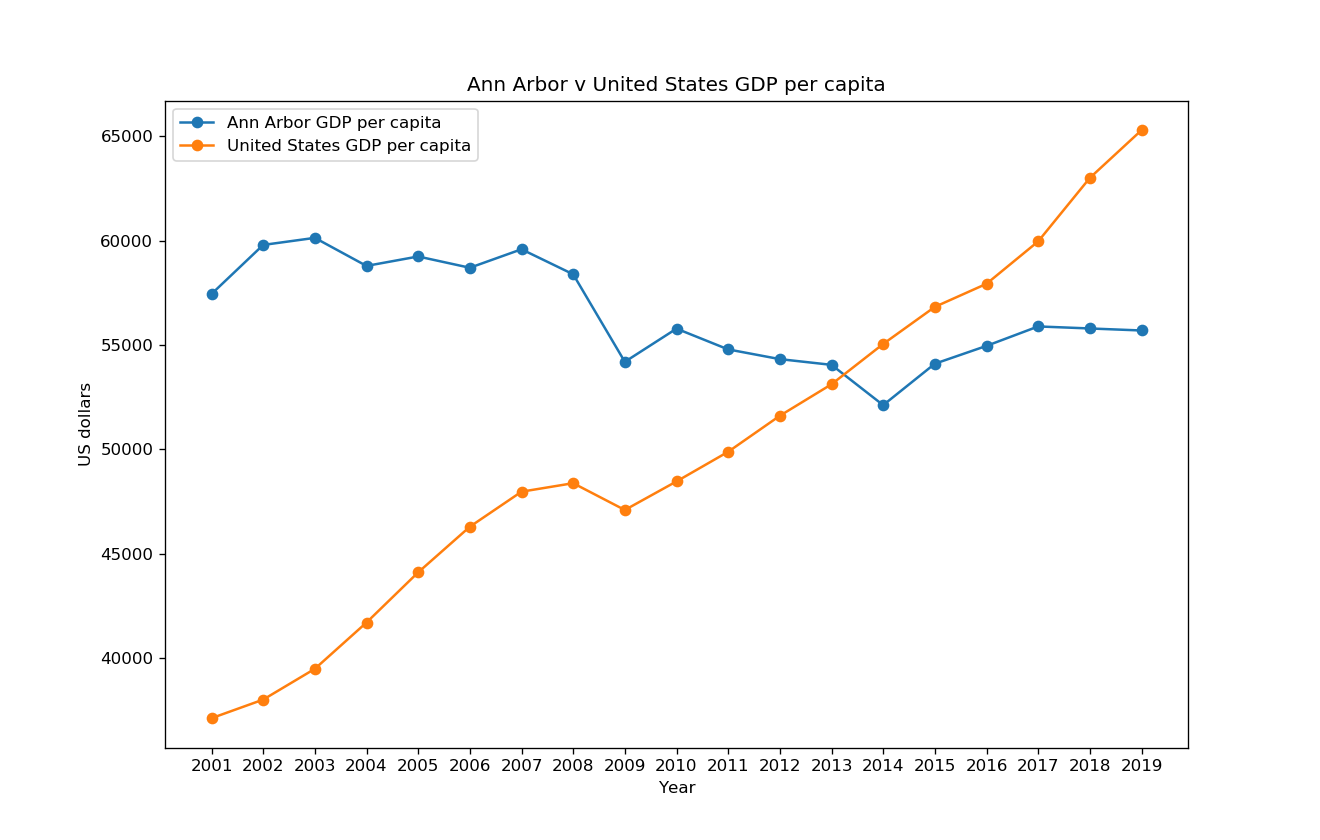

Text(0.5,0,'Year')

In [213]:
# merge dfs
fin = pd.merge(df, df2, how='inner', left_on='Year', right_on='Year')

# final cleaning
fin['Ann Arbor GDP string'] = fin['Ann Arbor GDP string'].apply(lambda x: x.replace('(Measured)', '')).apply(lambda x: x.replace('(Forecasted)', ''))
fin['United States GDP per capita'] = fin['United States GDP string'].apply(lambda x: x.replace(r'$', '')).apply(lambda x: x.replace(r',', '')).astype(float)

# create figure
plt.figure(figsize=(11, 7))

# set x axis to months
plt.xticks([i for i in range(0,len(fin['Year']))], fin['Year'].tolist())
# plot data
plt.plot(fin['Ann Arbor GDP per capita'], '-o', label='Ann Arbor GDP per capita')
plt.plot(fin['United States GDP per capita'], '-o', label='United States GDP per capita')
# create legend and title
plt.legend()
plt.gca().set_title('Ann Arbor v United States GDP per capita')
plt.gca().set_ylabel('US dollars')
plt.gca().set_xlabel('Year')

# def onclick(event):
#     year = str(2001 + round(event.xdata))
#     US_GDP = fin[fin['Year'] == year]['United States GDP per capita']
#     AA_GDP = fin[fin['Year'] == year]['Ann Arbor GDP per capita']
#     if abs(event.ydata-US_GDP) < abs(event.ydata-AA_GDP):
#         plt.gca().set_title('The United States GDP per capita at year {} is {}'.format(year,fin['United States GDP string']))
#     else:
#         plt.gca().set_title('The Ann Arbor GDP per capita at year {} is {}'.format(year,fin['Ann Arbor GDP string']))

# plt.gcf().canvas.mpl_connect('button_press_event', onclick) 